# Modular Exponentiation

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq
from typing import *
import numpy as np

## `ModExp`
Perform $b^e \mod{m}$ for constant `base` $b$, `mod` $m$, and quantum `exponent` $e$.

Modular exponentiation is the main computational primitive for quantum factoring algorithms.
We follow [GE2019]'s "reference implementation" for factoring. See `ModExp.make_for_shor`
to set the class attributes for a factoring run.

This bloq decomposes into controlled modular exponentiation for each exponent bit.

#### Parameters
 - `base`: The integer base of the exponentiation
 - `mod`: The integer modulus
 - `exp_bitsize`: The size of the `exponent` thru-register
 - `x_bitsize`: The size of the `x` right-register 

#### Registers
 - `exponent`: The exponent
 - `x [right]`: The output register containing the result of the exponentiation 

#### References
[GE2019] How to factor 2048 bit RSA integers in 8 hours using 20 million noisy qubits. [arxiv:1905.09749](https://arxiv.org/abs/1905.09749). Gidney and Ekerå. 2019.


In [2]:
from qualtran.bloqs.factoring.mod_exp import ModExp

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Example Instances

In [3]:
modexp_small = ModExp(base=3, mod=15, exp_bitsize=3, x_bitsize=2048)

In [4]:
modexp = ModExp(base=3, mod=15, exp_bitsize=8, x_bitsize=2048)

In [5]:
import sympy

g, N = sympy.symbols('g N')
modexp_symb = ModExp.make_for_shor(big_n=N, g=g)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([modexp_small, modexp, modexp_symb],
           ['`modexp_small`', '`modexp`', '`modexp_symb`'])

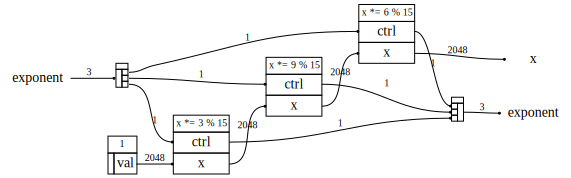

In [7]:
show_bloq(modexp_small.decompose_bloq())

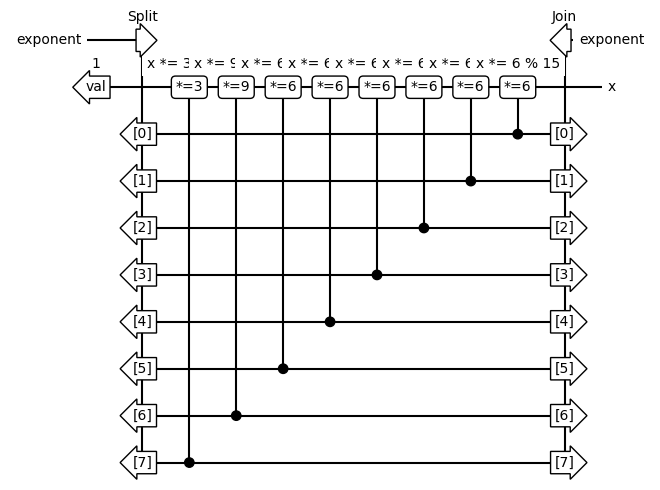

In [8]:
from qualtran.drawing import (
    get_musical_score_data, draw_musical_score, dump_musical_score)

msd_bloq = get_musical_score_data(modexp)
dump_musical_score(msd_bloq, 'mod_exp_bloq')

msd_cbloq = get_musical_score_data(modexp.decompose_bloq())
dump_musical_score(msd_cbloq, 'mod_exp_cbloq')

fig, ax = draw_musical_score(msd_cbloq)
ax.axis('equal')
ax.axis('off')
fig.tight_layout()